# Explorative Datenanalyse

Zunächst plotten wir das erste Bild im Trainingsdatensatz

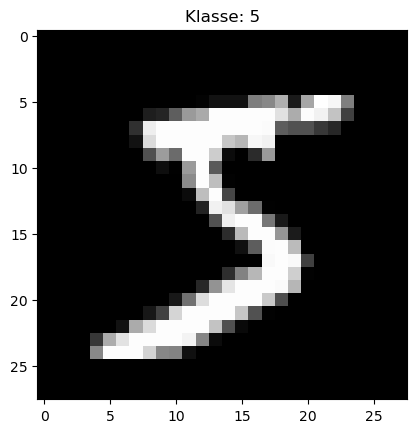

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.imshow(X_train[0], cmap='gray')
plt.title('Klasse: ' + str(y_train[0]))
plt.show()

Nun schauen wir uns 10 zufällige Bilder jeder Klasse an, um zu verstehen, wie jede Klasse aufgebaut ist, worin unterschiede in einzelnen Bildern liegen könnten.

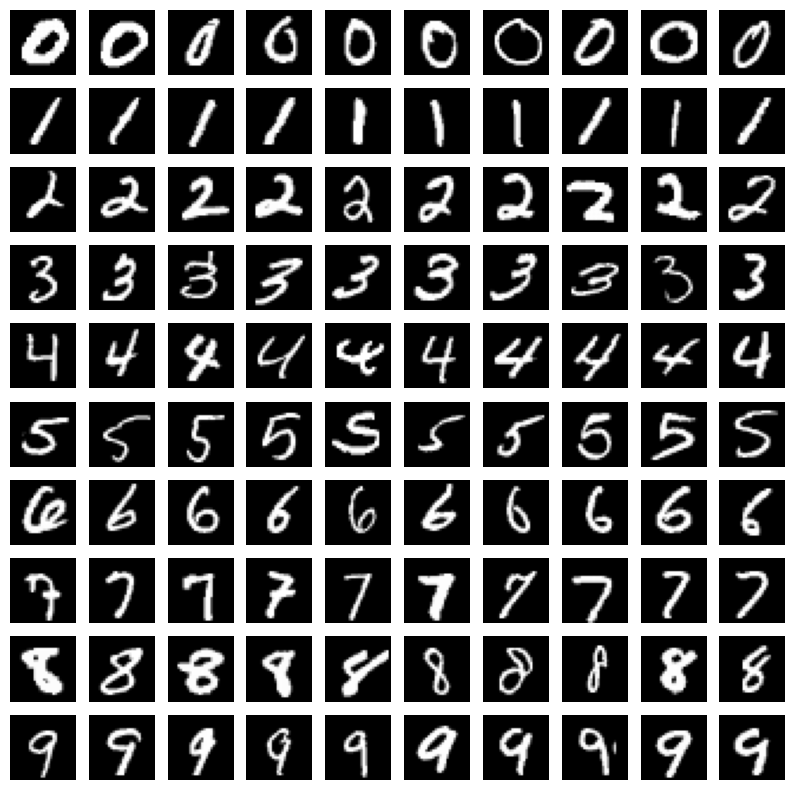

In [2]:
import numpy as np

indices = [np.random.choice(np.where(y_train==i)[0], 10, replace=False) for i in range(10)]
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[indices[i//10][i%10]], cmap='gray')
    ax.axis('off')

plt.show()

Sind die Klassen gleichmäßig im Datensatz vertreten?

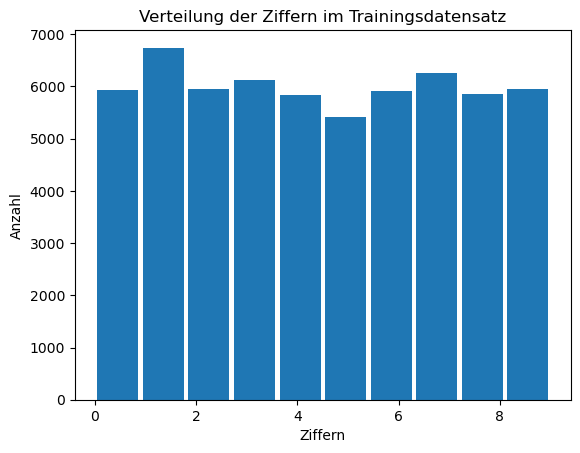

In [4]:
plt.hist(y_train, bins=10, rwidth=0.9)
plt.title('Verteilung der Ziffern im Trainingsdatensatz')
plt.xlabel('Ziffern')
plt.ylabel('Anzahl')
plt.show()

Wie stark unterscheidet sich die Helligkeit der Bilder? Dazu schauen wir die Pixelintensitäten an.

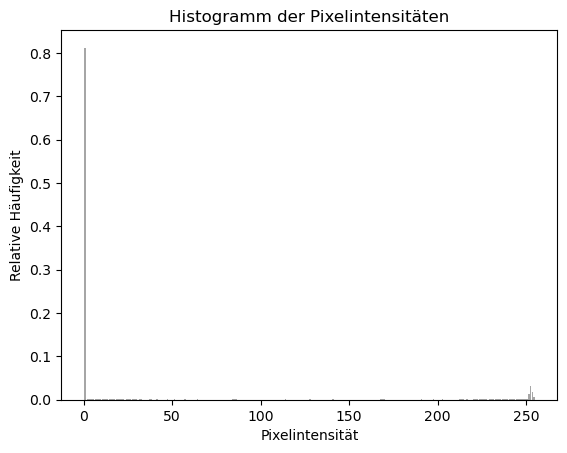

In [5]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))

plt.hist(X_train_flat.ravel(), bins=256, color='gray', alpha=0.7, rwidth=0.9, density=True)
plt.title('Histogramm der Pixelintensitäten')
plt.xlabel('Pixelintensität')
plt.ylabel('Relative Häufigkeit')
plt.show()

Nun schauen wir mithilfe einer PCA (Principal Component Analysis), wie ähnlich, also nahe beieinander die einzelnen Klassen sind.

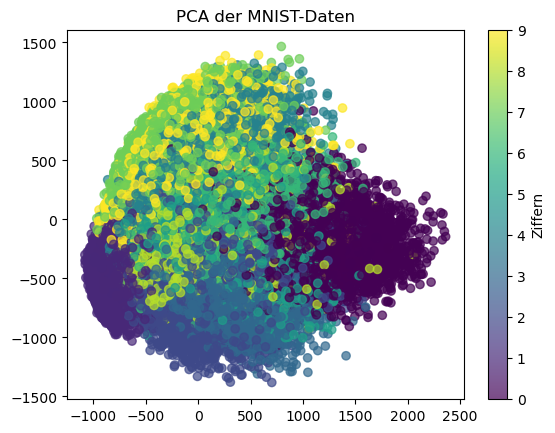

In [6]:
from sklearn.decomposition import PCA
X_train_flat = X_train.reshape((X_train.shape[0], -1))
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_flat)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Ziffern')
plt.title('PCA der MNIST-Daten')
plt.show()